In [14]:
import numpy as np
from numba import njit
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from PIL import Image
import gc
import cProfile
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 14

# Regular implementation

In [4]:
def regular_JuliaSetColor(c, size, pixels, max_iterations, string='\infty', isMandelbrot = False):
    minRe, maxRe, minIm,maxIm = -size, size, -size, size
    pointsRe, pointsIm = pixels, pixels
    max_iterations = max_iterations
    infinity_border = (1 + np.sqrt(1 + 4 * abs(c))) / 2
    image = np.zeros((pointsRe, pointsIm))

    for ip, Re in enumerate(np.linspace(minRe, maxRe, pointsRe)):
        for iq, Im in enumerate(np.linspace(minIm, maxIm, pointsIm)):
            if isMandelbrot:
                c = complex(Re, Im)
                z0 = 0
            else:
                z0 = complex(Re, Im)
            for k in range(max_iterations):
                z0 = z0 ** 2 + c
                if abs(z0) > infinity_border:
                    image[ip, iq] = max_iterations - k
                    break

    image = np.rot90(image)

    sns.heatmap(image, vmin=0, vmax=max_iterations, center= max_iterations/2, cmap= 'gnuplot2', cbar=False, square=True)
    if isMandelbrot:
        plt.title('Mandelbrot Set')
    else:
        plt.title('Julia Set given c = ' + str(c))
    plt.ylabel(f'Im($z_{string}$)')
    plt.xlabel(f'Re($z_{string}$)')
    plt.xticks(np.linspace(0, pixels-1, 5), np.round(np.linspace(-size, size, 5),2))
    plt.yticks(np.linspace(0, pixels-1, 5), -np.round(np.linspace(-size, size, 5),2))

5.06 s ± 986 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


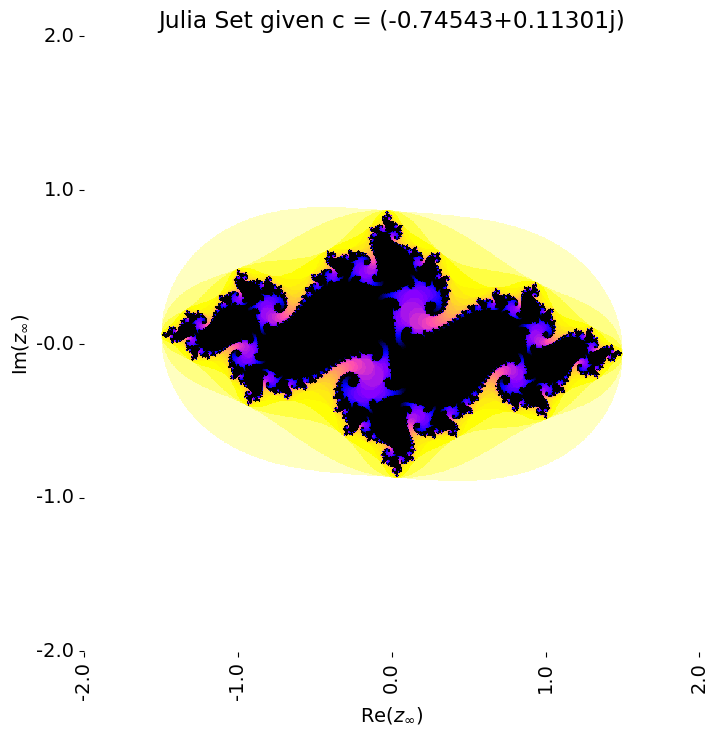

In [5]:
%%timeit
regular_JuliaSetColor(c = complex(-0.74543, 0.11301), size = 2, pixels = 1000, max_iterations = 50)

# Numba-based implementation

In [6]:
@njit(fastmath=True)
def count(c, size, pixels, max_iterations, infinity_border):
    minRe, maxRe, minIm, maxIm = -size, size, -size, size
    pointsRe, pointsIm = pixels, pixels
    infinity_border = (1 + np.sqrt(1 + 4 * abs(c))) / 2
    image = np.zeros((pointsRe, pointsIm))

    for ip, Re in enumerate(np.linspace(minRe, maxRe, pointsRe)):
        for iq, Im in enumerate(np.linspace(minIm, maxIm, pointsIm)):
            z0 = complex(Re, Im)
            for k in range(max_iterations):
                z0 = z0 ** 2 + c
                if abs(z0) >= infinity_border:
                    image[ip, iq] =  max_iterations - k
                    break

    return image

def numba_JuliaSetColor(c, size, pixels, max_iterations, string='\infty', isMandelbrot = False):
    image = count(c, size, pixels, max_iterations, string)
    image = np.rot90(image)

    sns.heatmap(image, vmin=0, vmax=max_iterations, center= max_iterations/2, cmap= 'gnuplot2', cbar=False, square=True)
    if isMandelbrot:
        plt.title('Mandelbrot Set')
    else:
        plt.title('Julia Set given c = ' + str(c))
    plt.ylabel(f'Im($z_{string}$)')
    plt.xlabel(f'Re($z_{string}$)')
    plt.xticks(np.linspace(0, pixels-1, 5), np.round(np.linspace(-size, size, 5),2))
    plt.yticks(np.linspace(0, pixels-1, 5), -np.round(np.linspace(-size, size, 5),2))

The slowest run took 4.01 times longer than the fastest. This could mean that an intermediate result is being cached.
2.37 s ± 1.03 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


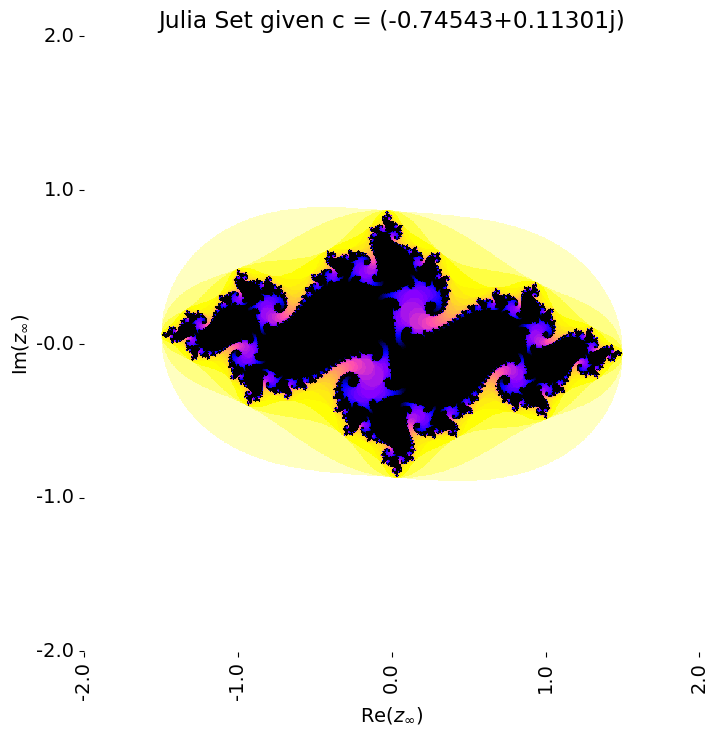

In [7]:
%%timeit
numba_JuliaSetColor(c = complex(-0.74543, 0.11301), size = 2, pixels = 1000, max_iterations = 50)

         422774 function calls (403096 primitive calls) in 1.570 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       14    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(all)
      245    0.000    0.000    0.047    0.000 <__array_function__ internals>:177(amax)
      244    0.000    0.000    0.047    0.000 <__array_function__ internals>:177(amin)
       28    0.000    0.000    0.001    0.000 <__array_function__ internals>:177(any)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(around)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(atleast_1d)
       70    0.000    0.000    0.002    0.000 <__array_function__ internals>:177(atleast_3d)
      143    0.000    0.000    0.003    0.000 <__array_function__ internals>:177(broadcast_arrays)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(can_cast)
        8    

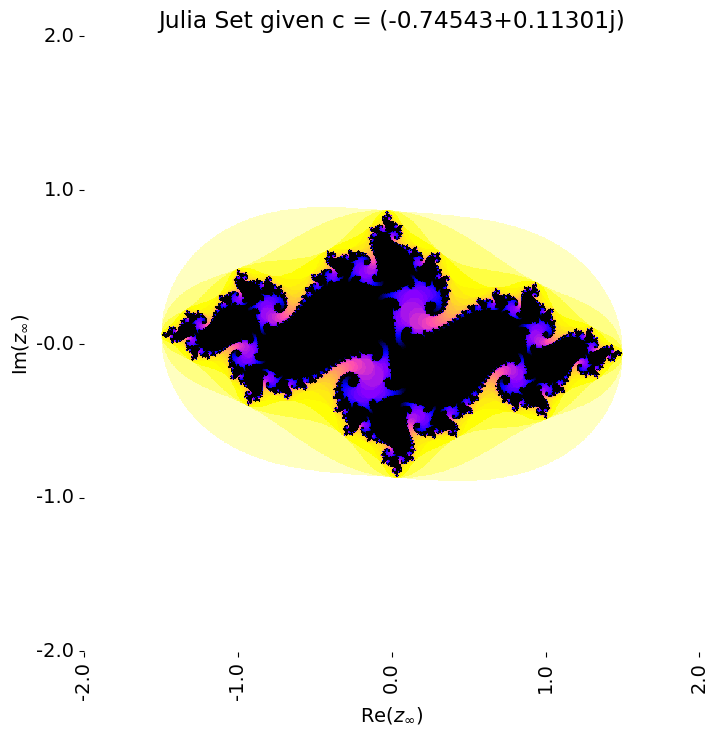

In [8]:
cProfile.run('numba_JuliaSetColor(c = complex(-0.74543, 0.11301), size = 2, pixels = 1000, max_iterations = 50)')

         7627033 function calls (7604352 primitive calls) in 6.450 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       14    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(all)
      245    0.000    0.000    0.038    0.000 <__array_function__ internals>:177(amax)
      244    0.000    0.000    0.036    0.000 <__array_function__ internals>:177(amin)
     1029    0.001    0.000    0.026    0.000 <__array_function__ internals>:177(any)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(around)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(atleast_1d)
       70    0.000    0.000    0.001    0.000 <__array_function__ internals>:177(atleast_3d)
      143    0.000    0.000    0.003    0.000 <__array_function__ internals>:177(broadcast_arrays)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(can_cast)
        8  

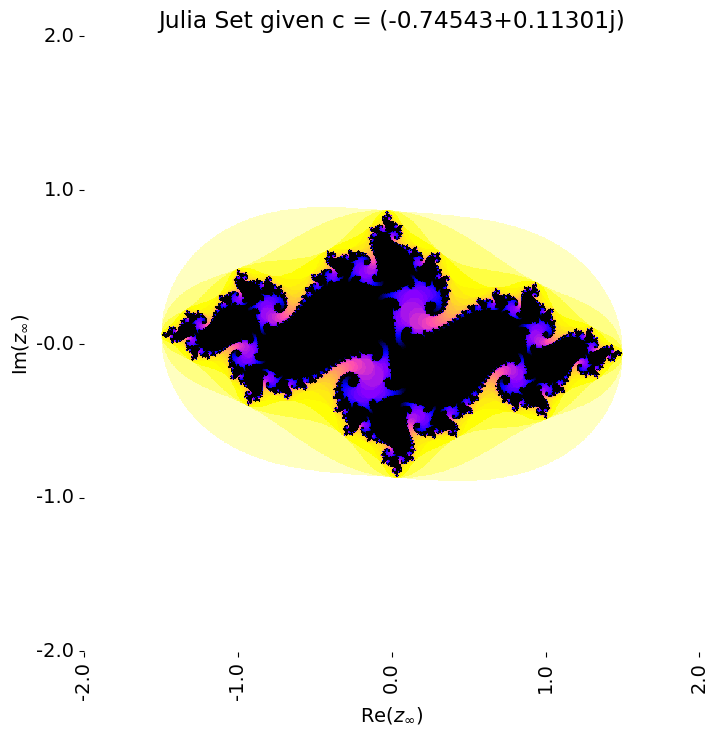

In [11]:
cProfile.run('regular_JuliaSetColor(c = complex(-0.74543, 0.11301), size = 2, pixels = 1000, max_iterations = 50)')

2.98 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.07 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
3.92 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
2.78 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
4.74 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
2.54 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
6.76 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
3.62 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
6.61 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
4.64 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


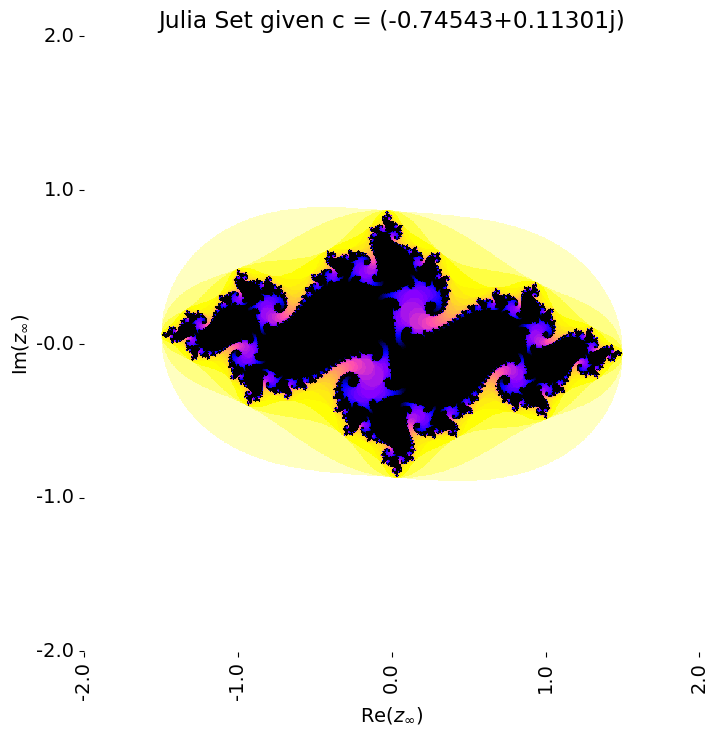

In [9]:
time1 = []
time2 = []
times = np.logspace(2, 10, 5, base=2).astype(int)
for i in times:
    t1 = %timeit -o -r 1 -n 1 regular_JuliaSetColor(c = complex(-0.74543, 0.11301), size = 2, pixels = 1000, max_iterations = 50)
    t2 = %timeit -o -r 1 -n 1 numba_JuliaSetColor(c = complex(-0.74543, 0.11301), size = 2, pixels = 1000, max_iterations = 50)
    time1.append(t1.best)
    time2.append(t2.best)

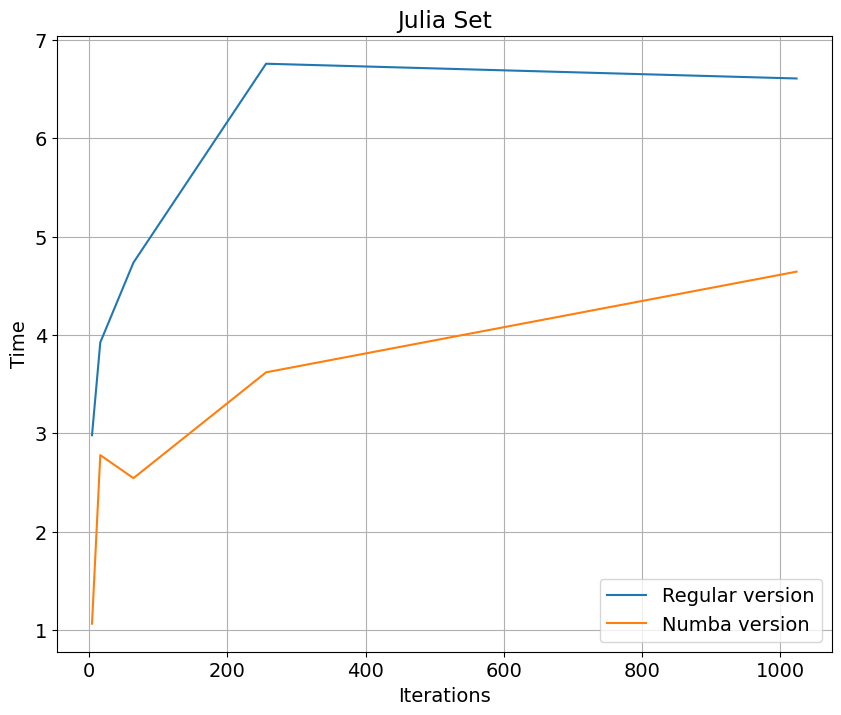

In [10]:
plt.plot(times, time1, label='Regular version')
plt.plot(times, time2, label='Numba version')
plt.title('Julia Set')
plt.xlabel('Iterations')
plt.ylabel('Time')
plt.legend()
plt.grid()